In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def load_data(folder_path):
    data = []
    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            df = pd.read_csv(os.path.join(folder_path, file))
            data.append(df)
    return pd.concat(data)  

gcg_data = load_data('../datasets/gcg')
gcg_eos_data = load_data('../datasets/gcg_eos')


In [9]:
def calculate_success_rates(data, step_intervals):
    rates = []
    total = 128
    for step in step_intervals:
        successful = (data['steps'] <= step).sum() 
        rate = successful / total 
        rates.append(rate)
    return rates

step_intervals = range(0, 1001, 100)  # 0, 100, 200, ... 1000
gcg_rates = calculate_success_rates(gcg_data, step_intervals)
gcg_eos_rates = calculate_success_rates(gcg_eos_data, step_intervals)


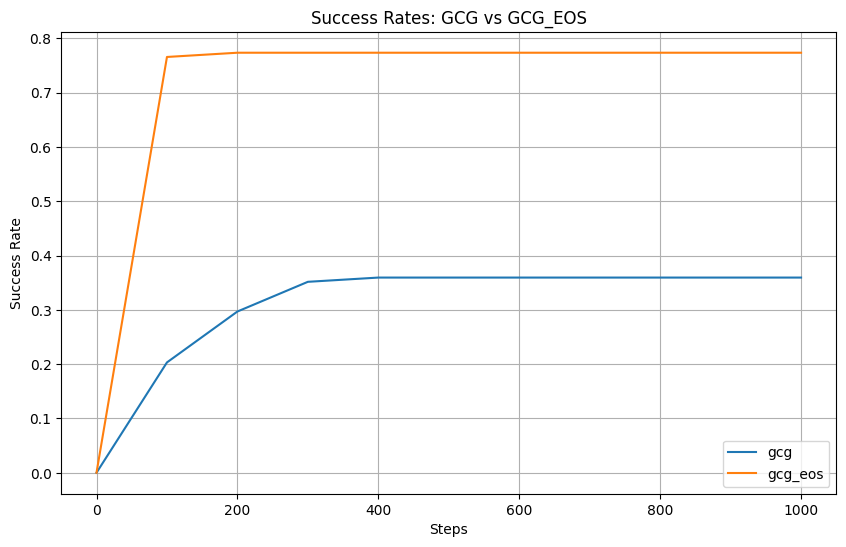

In [11]:
plt.figure(figsize=(10, 6)) 
plt.plot(step_intervals, gcg_rates, label='gcg')
plt.plot(step_intervals, gcg_eos_rates, label='gcg_eos')
plt.xlabel('Steps')
plt.ylabel('Success Rate')
plt.title('Success Rates: GCG vs GCG_EOS')
plt.legend()
plt.grid(True) 
plt.savefig('gcg_vs_gcg_eos.pdf')
plt.show()
